In [1]:
from __future__ import print_function

#Data Visualization

##Data Visualization and Exploration 

###1: Data exploration

Whenever you encounter a new dataset you'd like to analyze or use in a project, it's incredibly important to be curious and explore the data to get a better feel for it. Data visualization is the dominant technique within data exploration that allows you to develop some initial hypotheses for the relationships between variables and some general trends that will help you navigate your data workflow better.

In this mission, we'll walkthrough how to use Pandas in conjunction with Matplotlib to effectively utilize visualization to explore a dataset. We'll be working with the data from the American Community Survey from a survey on job outcomes for recent college graduates based on the major they studied in college.

You can find the cleaned up version of the dataset on <a href = "https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv">FiveThirtyEight's Github repo</a>.

Here are some of the columns in the dataset:

- Rank - Rank by median earnings
- Major_code - Major code
- Major - Major description
- Major_category - Category of major
- Total - Total number of people with major
- Sample_size - Sample size (unweighted) of full-time
- Men - Male graduates
- Women - Female graduates
- ShareWomen - Women as share of total
- Employed - Number employed

In [2]:
import pandas as pd
recent_grads = pd.read_csv("data/recent-grads.csv")

print("recent_grads.columns:\n", recent_grads.columns)
recent_grads.head(5)

recent_grads.columns:
 Index(['Rank', 'Major_code', 'Major', 'Major_category', 'Total', 'Sample_size',
       'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')


,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


###2: Histograms

A histogram is a graph that enables you to visualize the distribution of values of a column.

To create a histogram for a column, first divide the range of values for that column into equal-sized intervals, or bins. Then, count the number of values that fall into that bin and plot the interval on the x-axis and the count, or number of values in that bin, on the y-axis.

Pandas DataFrame objects have a few plotting functions that make it easy to quickly explore columns in a DataFrame. While we can understand potential relationships between 2 variables using a line plot, histograms allow us to better understand single columns since they help us visualize how values are distributed. This helps us look for any obvious outliers and helps us understand each column a little better.

Since these functions use Matplotlib underneath, let's import that library and explore the <a href = "http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas-dataframe-hist">hist() function</a> to plot histograms of columns we want to learn more about.

The documentation for the hist() function specifies a column parameter to specify the column(s) we want a histogram for. We can plot the histogram for any of the numeric columns by specifying the names of the columns in the column parameter. In the below code cell, we specify the columns we want Pandas to generate histograms for in the variable columns and then pass it in to the column parameter in the DataFrame .hist() function.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B94D588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9A4EF0>]], dtype=object)

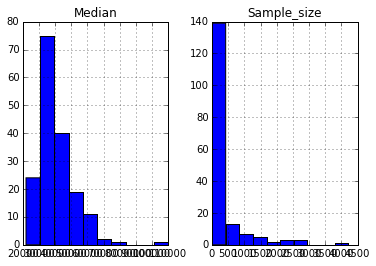

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

columns = ['Median','Sample_size']
recent_grads.hist(column=columns)

###3: Customizing histograms

In the above code cell, you'll notice that the x-axis labels are illegible since they're bunched together too closely. The graphs also contain grids behind the bars to help us understand what y-axis values each bar corresponds to.

In the following code cell, we re-orient the histograms so that they're displayed vertically on top of each other (instead of on the same horizontal area) and hide the grid so the graphs are cleaner.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA11470>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD13400>]], dtype=object)

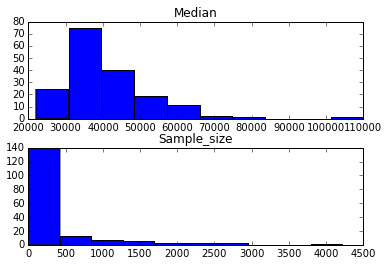

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

columns = ['Median','Sample_size']

# Set the `layout` parameter as `(2,1)` so the graphs are displayed as 2 rows & 1 column 
# Then set `grid` parameter to `False`.
recent_grads.hist(column=columns, layout=(2,1), grid=False)

###4: Practice: histograms

From the first histogram of the Median column, we learn that most majors fall into the bins between the values 20,000 and 70,000 and there's very few majors that make more than that. While this doesn't tell us the proportion of students who fall into those buckets (since vastly more students take certain majors), this observation helps us generate new questions and hypotheses for our data workflow like:

- How many majors make more than 70,000?
- How about more than 100,000?
- What percentage of students majored in one of these high-earning majors?
- Do these high-earning graduates also have low unemployment rates?

From the Sample_size histogram, we immediately understand that more than 80% (from eyeballing visually) of the majors had less than 500 students participate in the study. This histogram encourages to think about:

- How was the survey conducted and what assumptions were made?
- Do the majors with higher sample size (Sample_size column) have more overall graduates (Total column) or is this a survey response bias?

By default, the method sets n as 10 for the number of bins but you can specify a different value using the bins parameter.

####Instructions

Generate a histogram of just the Sample_size column using 50 bins instead of the default 10 and with the original grid preserved : <a href = "http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas.DataFrame.hist">.hist() documentation</a>.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDCC9E8>]], dtype=object)

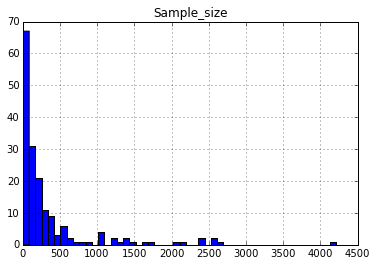

In [5]:
%matplotlib inline

recent_grads.hist(bins=50,column='Sample_size')

###5: Box plots

To get a better, high-level sense of how representative the Sample_size for the survey is to the Total number of students who graduated with the major, we'll plot these values to compare visually. Since the values for Sample_size and Total vary quite a bit per major, graphing all 173 majors to compare could make it difficult to compare majors effectively.

Each major in the dataset is grouped into a category, represented as the value in Major_category for each row. We can utilize this column to make high-level comparisons across the dataset since comparing all 173 majors, even using graphs, would be quite difficult.

Since we need to be able to easily compare ranges of values against each other, we'll use box plots, which enable us to visualize quartiles of values for a column broken down by Major_category. Box plots are similar to histograms in that the x-axis contain the bins or categories (in this case, the different Major_category values) and the y-axis represents information about values in that category. The difference, however, is that the y-axis doesn't contain a bar for each category but instead contain what's called a box and whisker diagram.

Let's first generate a boxplot to get a visual idea of what one looks like and we'll walkthrough how they work afterwards.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

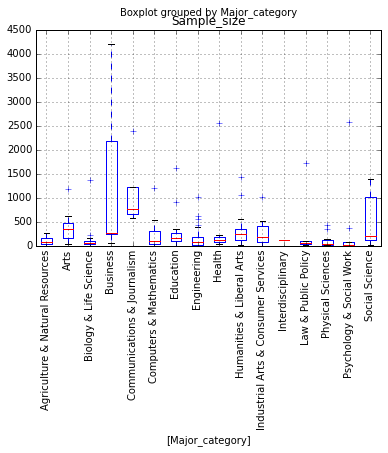

In [6]:
%matplotlib inline

# Select just `Sample_size` & `Major_category` columns from `recent_grads` 
# Name the resulting DataFrame as `sample_size`
sample_size = recent_grads[['Sample_size', 'Major_category']]

# Run the `boxplot()` function on `sample_size` DataFrame and specify, as a parameter, 
# that we'd like a box and whisker diagram to be generated for each unique `Major_category`
sample_size.boxplot(by='Major_category')

# Format the resulting plot to make the x-axis labels (each `Major_category` value) 
# appear vertically instead of horizontally (by rotating 90 degrees)
plt.xticks(rotation=90)

###6: Explanation: box plots

In the the .boxplot() function above, Pandas:

- filtered the DataFrame to just the Sample_size and Major_category columns
- segmented the values in the Sample_size column into groups, one for each unique Major_category since we specified it as the by parameter
- generated a box and whisker diagram for each group using the Sample_size values for that group

A box and whisker diagram is another way of representing the distribution of a set of values. While with a histogram, you set the number of bins you'd like the values to be grouped into, with a box and whisker diagram the number of "bins" are fixed at 4. Each "bin" is called a quartile and each quartile represents approximately 1/4th the values in the full set of values. Unlike in a histogram, in a box and whisker diagram, each interval doesn't have to be of equal length since the grouping of values into intervals focuses on the percentile distribution of values not on equal interval lengths. The name, box and whisker diagram, refers to the fact that the middle 2 quartiles are located within the box in the middle (with the median represented as a line in the box) and the lower and upper quartiles are represented as lines (resembling whiskers) protruding from either side of the box.

In the box plot we generated, you'll notice that each Major_category, the x-axis, has a box and whisker diagram that looks different from each other based on how the values for Sample_size are distributed for that specific Major_category.

###7: Practice: box plots

Since we want to compare the distribution of values for each Major_category for 2 different columns, we need a box plot for each column's values. By generating a box plot for each column, you can easily visually compare if the box and whisker diagrams for each Major_category in the Sample_size column match those from the Total column.

####Instructions

Generate a box plot for the values in the Total column, grouped by Major_category to match how we grouped the majors in our box plot for the Sample_size column.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

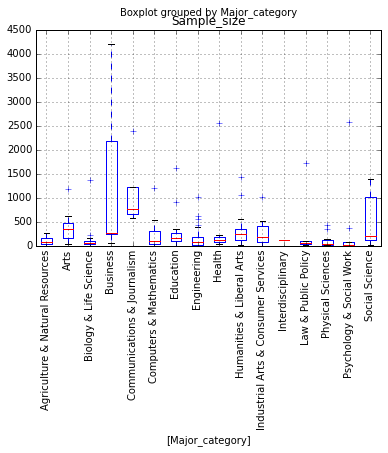

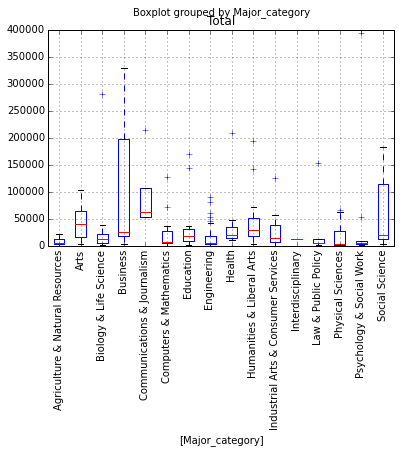

In [7]:
%matplotlib inline

recent_grads[['Sample_size', 'Major_category']].boxplot(by='Major_category')
plt.xticks(rotation=90)

recent_grads[['Total', 'Major_category']].boxplot(by='Major_category')
plt.xticks(rotation=90)

###8: Multiple plots in one chart

We now want to explore which variables could play a role in determining a graduate's Median salary in some way. Specifically, we'd like to get a high-level sense of which columns correlate more strongly with the Median salary than others.

To accomplish this, we can actually generate multiple plots on the same chart and look for any general indicators of a correlation. In the following code cell, we generate 2 <a href = "http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter">scatter plots</a> using the same y-axis but different x-axes and then use plt.show() afterwards to display the 2 plots on the same chart. We then use the color parameter to plot each scatter plot using a different color so we can easily see the difference.

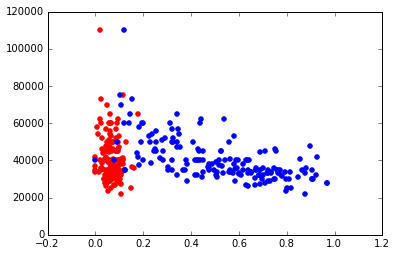

In [8]:
%matplotlib inline

# Plot Unemployment_rate on x-axis, Median salary on y-axis, in red
plt.scatter(recent_grads['Unemployment_rate'], recent_grads['Median'], color='red')
# Plot ShareWomen (Female % in major) on x-axis, Median salary on y-axis, in blue
plt.scatter(recent_grads['ShareWomen'], recent_grads['Median'], color='blue')
plt.show()

###9: Practice: multiple plots in one chart

From the previous plot, we can tell that there's a slight linear correlation between ShareWomen and Median salary but not any obvious relationship between Unemployment_rate and Median salary.

Let's see if this observation holds true when we instead use the 25th percentile salary instead of the Median salary.

####Instructions

Generate 2 scatter plots on the same chart, one for the Unemployment_rate and one for ShareWomen, both compared against the y-axis of the 25th percentile salary. The Unemployment_rate scatter plot should be in red while the ShareWomen plot should be in blue.

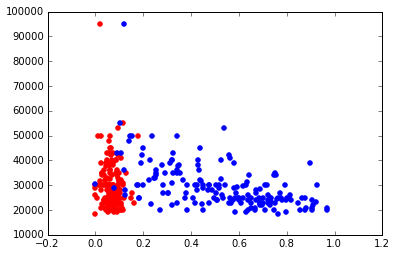

In [9]:
%matplotlib inline

plt.scatter(recent_grads['Unemployment_rate'], recent_grads['P25th'], color='red')
plt.scatter(recent_grads['ShareWomen'], recent_grads['P25th'], color='blue')
plt.show()